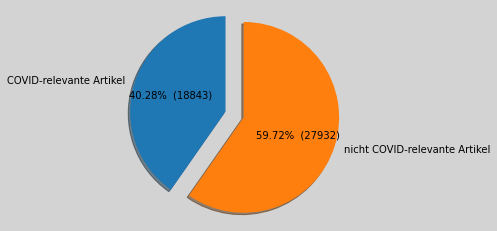

In [2]:
import matplotlib.pyplot as plt

labels = ["COVID-relevante Artikel", "nicht COVID-relevante Artikel"]

prozente = [18843, 46775-18843]

explode = (0.2, 0)

fig1, ax1 = plt.subplots()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1.set_facecolor('lightgrey')

ax1.pie(prozente, explode = explode, labels = labels, autopct= make_autopct(prozente), shadow=True, startangle=90)

ax1.axis('equal') 

plt.show()





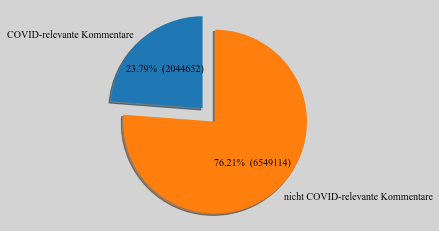

In [9]:
labels = ["COVID-relevante Kommentare", "nicht COVID-relevante Kommentare"]

prozente = [2044652, 8593766-2044652]

explode = (0.2, 0)

fig1, ax1 = plt.subplots()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1.set_facecolor('lightgrey')

ax1.pie(prozente, explode = explode, labels = labels, autopct= make_autopct(prozente), shadow=True, startangle=90)

ax1.axis('equal') 

plt.show()

In [4]:
from collections import Counter

meine_kommentare = Counter()


with open ("corona_relevante_kommentare", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            meine_kommentare[line.split("\t")[4]] += 1
        except IndexError:
            pass

del meine_kommentare["None"]

anzahl = meine_kommentare.values()





In [5]:
# Zählt wie oft ein Kommentar von einem bestimmten User auf einer bestimmten Ebene auftaucht

from collections import defaultdict
node_counter = defaultdict(Counter)
names = [x[0] for x in meine_kommentare.most_common()[:20]]

with open ("corona_relevante_kommentare", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            if line.split("\t")[4] in names:
                #print(line.split("\t")[4],line.split("\t")[3]) 
                node_counter[line.split("\t")[4]].update(line.split("\t")[3])
        except IndexError:
            pass

print(node_counter)



defaultdict(<class 'collections.Counter'>, {'mhwse': Counter({'1': 2089, '3': 1582, '2': 1493, '0': 670}), 'Torben-k7b2MJlWR': Counter({'2': 3076, '1': 2784, '3': 2714, '0': 263}), 'HolgerHamburgo': Counter({'1': 2065, '3': 1880, '0': 1367, '2': 1346}), 'Karl-tBDI7C7ZR': Counter({'3': 2052, '2': 1732, '1': 1517, '0': 712}), 'Alwin-hVe4_eMMg': Counter({'1': 3976, '3': 3799, '2': 1136, '0': 178}), 'Knutie': Counter({'3': 6753, '1': 2537, '2': 2160, '0': 24}), 'Jürgen-UYQ1UxHMg': Counter({'1': 2240, '3': 1918, '2': 1165, '0': 109}), 'Engineer': Counter({'3': 1966, '1': 1900, '2': 1472, '0': 384}), 'iris_b': Counter({'3': 7879, '1': 5956, '2': 3852, '0': 1520}), 'Ro_Laren': Counter({'3': 2508, '1': 1372, '2': 1125, '0': 572}), 'Alex-jFlznaUWR': Counter({'1': 2590, '3': 1984, '2': 1216, '0': 227}), 'Tullius': Counter({'3': 8718, '1': 5598, '2': 3595, '0': 1355}), 'HeiterbisWolkig': Counter({'3': 6869, '1': 2675, '2': 1694, '0': 38}), 'Jürgen-SzIee4RMg': Counter({'3': 3869, '1': 3290, '2': 2

In [6]:
# Zählt die Monate der Kommentare, in welchem Monat wurde der Kommentar verfasst und speichert im Dicionary
MonthCounterCOVID = defaultdict(Counter)
MonthCounterNOCOV = defaultdict(Counter)
monthDict={"01":'Jan', "02":'Feb', "03":'Mar', "04":'Apr', "05":'May', "06":'Jun', "07":'Jul', "08":'Aug', "09":'Sep', "10":'Oct', "11":'Nov', "12":'Dec'}
covid_ids = set()

with open ("corona_relevante_kommentare", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            covid_ids.add(line.split("\t")[0])
            MonthCounterCOVID[line.split("\t")[1][2:4]].update({monthDict[line.split("\t")[1][5:7]]: 1})
            #MonthCounter[monthDict[line.split("\t")[1][5:7]]] += 1
        except IndexError:
            pass



MonthCounterCOVID



defaultdict(collections.Counter,
            {'20': Counter({'Mar': 99183,
                      'Apr': 156602,
                      'May': 114948,
                      'Jun': 58923,
                      'Jul': 56837,
                      'Aug': 86039,
                      'Sep': 52441,
                      'Oct': 127308,
                      'Nov': 126481,
                      'Dec': 162933,
                      'Feb': 13182,
                      'Jan': 1766}),
             '21': Counter({'Feb': 146887,
                      'Jul': 88865,
                      'Jan': 201770,
                      'Jun': 95462,
                      'Mar': 183305,
                      'Apr': 163084,
                      'May': 106470})})

In [7]:
import pandas as pd
Months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

Comment_number_by_month = []
years = []
months = []
for i in range(len(MonthCounterCOVID["20"].values())):
    years.append("20")

for i in range(len(MonthCounterCOVID["21"].values())):
    years.append("21")

for year in MonthCounterCOVID.keys():
    for i in range(len(Months_order)):
        Comment_number_by_month.append(MonthCounterCOVID[year][Months_order[i]])

months.extend(Months_order)
months.extend(Months_order[:7])

del Comment_number_by_month[-5:]

print(Comment_number_by_month)
print(len(months))
print(len(years))
DF_months = pd.DataFrame({"Year": years, "Month": months, "COVID": Comment_number_by_month})

DF_months

[1766, 13182, 99183, 156602, 114948, 58923, 56837, 86039, 52441, 127308, 126481, 162933, 201770, 146887, 183305, 163084, 106470, 95462, 88865]
19
19


,Year,Month,COVID
0,20,Jan,1766
1,20,Feb,13182
2,20,Mar,99183
3,20,Apr,156602
4,20,May,114948
5,20,Jun,58923
6,20,Jul,56837
7,20,Aug,86039
8,20,Sep,52441
9,20,Oct,127308


In [8]:
with open ("alle_kommentare.txt", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            if line.split("\t")[0] not in covid_ids:
                MonthCounterNOCOV[line.split("\t")[1][2:4]].update({monthDict[line.split("\t")[1][5:7]]: 1})
                #MonthCounter[monthDict[line.split("\t")[1][5:7]]] += 1
        except IndexError:
            pass

MonthCounterNOCOV.items()

dict_items([('20', Counter({'Sep': 345728, 'Nov': 338839, 'Dec': 332476, 'Aug': 321061, 'Oct': 318162, 'Jul': 300807, 'Jun': 241689, 'May': 220849, 'Apr': 156459, 'Feb': 141978, 'Mar': 135286, 'Jan': 66132})), ('21', Counter({'Apr': 443569, 'Mar': 429417, 'Jun': 404149, 'May': 395213, 'Jan': 388380, 'Feb': 350296, 'Jul': 252809, 'Aug': 3}))])

In [9]:
Comment_number_by_month_nocov = []
for year in MonthCounterNOCOV.keys():
    for i in range(len(Months_order)):
        Comment_number_by_month_nocov.append(MonthCounterNOCOV[year][Months_order[i]])
del Comment_number_by_month_nocov[-5:]

DF_months.insert(3, "No COVID", Comment_number_by_month_nocov)



In [ ]:
DF_months

,Year,Month,COVID,No COVID
0,20,Jan,1766,66132
1,20,Feb,13182,141978
2,20,Mar,99183,135286
3,20,Apr,156602,156459
4,20,May,114948,220849
5,20,Jun,58923,241689
6,20,Jul,56837,300807
7,20,Aug,86039,321061
8,20,Sep,52441,345728
9,20,Oct,127308,318162


Text(0, 0.5, 'Number of comments')

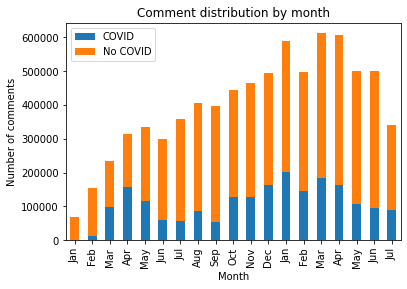

In [10]:
ax = DF_months.plot(kind ="bar",stacked = True, title="Comment distribution by month")
ax.set_xticklabels(DF_months.Month)
ax.set_xlabel("Month")
ax.set_ylabel("Number of comments")

In [ ]:
import pandas as pd

,Names,Zeros,Ones,Twos,Threes
11,Tullius,1355,5598,3595,8718
8,iris_b,1520,5956,3852,7879
14,No_Retreat_No_Surrender,408,4097,2385,8181
15,knielang,3700,5164,2233,1924
5,Knutie,24,2537,2160,6753
12,HeiterbisWolkig,38,2675,1694,6869
13,Jürgen-SzIee4RMg,196,3290,2109,3869
4,Alwin-hVe4_eMMg,178,3976,1136,3799
1,Torben-k7b2MJlWR,263,2784,3076,2714
18,Neve,68,2602,1534,3096


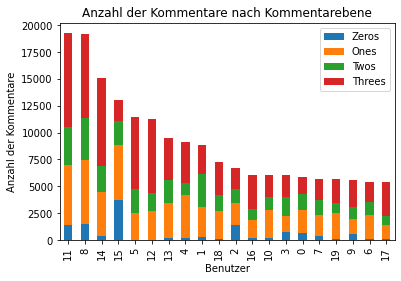

In [ ]:
new_names = [x[0] for x in node_counter.items()]
zeros = [x[1]["0"] for x in node_counter.items()]
ones = [x[1]["1"] for x in node_counter.items()]
twos = [x[1]["2"] for x in node_counter.items()]
threes = [x[1]["3"] for x in node_counter.items()]
summe = [a + b +c + d for a,b,c,d in zip(zeros, ones, twos, threes) ]

df = pd.DataFrame({"Names": new_names, "Zeros": zeros, "Ones": ones, "Twos": twos, "Threes": threes, "Sum": summe})

df = df.sort_values("Sum", ascending= False)



del df["Sum"]

ax = df.plot(kind ="bar", stacked = True, title="Anzahl der Kommentare nach Kommentarebene")
ax.set_xlabel("Benutzer")
ax.set_ylabel("Anzahl der Kommentare")

df


In [ ]:
# width = 0.35

# fig = plt.figure()
# ax = fig.add_subplot(111)

# ax.barh(names_sorted, zeros_sorted, width, label="0-Kommentar")
# ax.barh(names_sorted, ones_sorted, width, label="1-Kommentar")
# ax.barh(names_sorted, twos_sorted, width, label="2-Kommentar")
# ax.barh(names_sorted, threes_sorted, width, label="3-Kommentar")

# ax.set_ylabel("Anzahl der Kommentare")
# ax.set_title("Anzahl der Kommentare nach Ebene")
# ax.legend()

# plt.show()

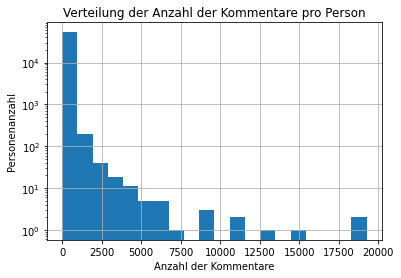

In [ ]:
values = meine_kommentare.values()
n, bins, patches = plt.hist(values, bins=20)

plt.xlabel('Anzahl der Kommentare')
plt.ylabel('Personenanzahl')
plt.yscale("log")
plt.title('Verteilung der Anzahl der Kommentare pro Person')
plt.grid(True)
plt.show()

In [ ]:
top20 = meine_kommentare.most_common(20)
namen, kommentare = zip(*top20)



In [ ]:
import statistics

kommentaremedian = statistics.median(anzahl)
print(f"Median:{kommentaremedian}")
print(f"Mean {statistics.mean(anzahl)}")

Median:3.0
Mean 37.39085750789118


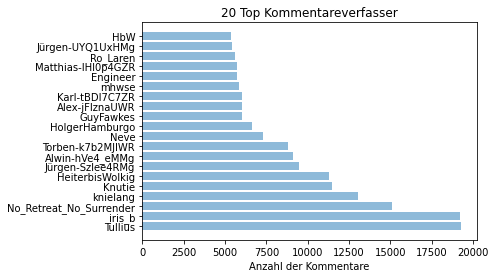

In [ ]:
import numpy as np

y_pos = np.arange(len(namen))

plt.barh(y_pos, kommentare, align="center", alpha=0.5)
plt.yticks(y_pos, namen)
plt.xlabel("Anzahl der Kommentare")
plt.title("20 Top Kommentareverfasser")

plt.show()

In [ ]:
statistics.mean(kommentare)

9118.8

In [1]:
# Für einen bestimmten User die Kommentare auslesen

def create_user_comments_txt(username: str):

    annotierkommentare = []

    with open ("corona_relevante_kommentare", mode = "r+", encoding="utf-8") as f:
        for line in f:
            try:
                if line.split("\t")[4] == username and line.split("\t")[3] == "0":
                    annotierkommentare.append((line.split("\t")[5], line.split("\t")[1]))
            except IndexError:
                pass

    länge = len(annotierkommentare)

    neuesten_10 = annotierkommentare[:10]
    mittel_10 = annotierkommentare[(länge//2):(länge//2+10)]
    alte_10 = annotierkommentare[-10:]


    with open (username + "_alte_10"  + ".txt", encoding="utf-8", mode = "w+") as f:
        for kommentar in alte_10:
            f.write(str(kommentar[1]) +"\t"+str(kommentar[0])+"\n")
    
    with open (username + "_mittel_10" + ".txt", encoding="utf-8", mode = "w+") as f:
        for kommentar in mittel_10:
            f.write(str(kommentar[1]) +"\t"+str(kommentar[0])+"\n")

    with open (username + "_neuesten_10" + ".txt", encoding="utf-8", mode = "w+") as f:
        for kommentar in neuesten_10:
            f.write(str(kommentar[1]) +"\t"+str(kommentar[0])+"\n")
    

In [ ]:
#create_user_comments_txt("knielang")
#create_user_comments_txt('Rainer-ppN5YarZg')
create_user_comments_txt('Elektromotor')

In [ ]:
### Shows amount of 0 level comments in covid textfile
test = 0
with open ("corona_relevante_kommentare", mode = "r+", encoding="utf-8") as f:
    for line in f:
        try:
            if line.split("\t")[3] == "0":
                test += 1
        except IndexError:
            pass
print(test)

460853


In [ ]:
list(meine_kommentare.keys())[list(meine_kommentare.values()).index(500)]


list(meine_kommentare.keys())[list(meine_kommentare.values()).index(500)]


'Elektromotor'

In [ ]:
sortierte_values = list(meine_kommentare.values())

sortierte_values.sort()

In [2]:
import os
from collections import defaultdict
if os.getcwd() != "c:\\Users\\Kirchner\\Desktop\\Masterarbeit\\Annotieren\\30er Annotationen":    
    cwd = os.getcwd()
    os.chdir(os.path.join(cwd, "Annotieren\\30er Annotationen"))
else:
    pass


example_annotations = defaultdict(list)
for txt_name in os.listdir():
    with open (txt_name, encoding="utf-8", mode = "r") as f:
        for line in f:
            try:
                label = line.split("\t")[2]
                time = line.split("\t")[0]
                if label in ["neutral", "negative", "positive"]:
                    example_annotations[txt_name].append(label)
                else:
                    print(f"This is not correctly annotated: {label, txt_name, time}" )
            except IndexError:
                pass

example_annotations_names = list(example_annotations.keys())


durchsch_alt = Counter(example_annotations[example_annotations_names[0]])
durchsch_mitte = Counter(example_annotations[example_annotations_names[1]])
durchsch_neu = Counter(example_annotations[example_annotations_names[2]])
wenig_alt = Counter(example_annotations[example_annotations_names[3]])
wenig_mitte = Counter(example_annotations[example_annotations_names[4]])
wenig_neu = Counter(example_annotations[example_annotations_names[5]])
viel_alt = Counter(example_annotations[example_annotations_names[6]])
viel_mitte = Counter(example_annotations[example_annotations_names[7]])
viel_neu = Counter(example_annotations[example_annotations_names[8]])



FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: 'c:\\Users\\Kirchner\\Desktop\\Masterarbeit\\Annotieren\\30er Annotationen'

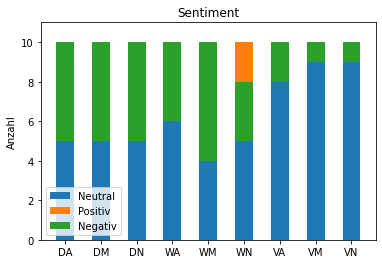

In [ ]:
names_example = ["DA", "DM", "DN", "WA", "WM", "WN", "VA", "VM", "VN"]

neutral = [durchsch_alt["neutral"], durchsch_mitte["neutral"], durchsch_neu["neutral"],
           wenig_alt["neutral"], wenig_mitte["neutral"], wenig_neu["neutral"], 
           viel_alt["neutral"], viel_mitte["neutral"], viel_neu["neutral"]]

positive  = [durchsch_alt["positive"], durchsch_mitte["positive"], durchsch_neu["positive"],
           wenig_alt["positive"], wenig_mitte["positive"], wenig_neu["positive"], 
           viel_alt["positive"], viel_mitte["positive"], viel_neu["positive"]]

negative  = [durchsch_alt["negative"], durchsch_mitte["negative"], durchsch_neu["negative"],
           wenig_alt["negative"], wenig_mitte["negative"], wenig_neu["negative"], 
           viel_alt["negative"], viel_mitte["negative"], viel_neu["negative"]] 

width = 0.5

fig, ax = plt.subplots()

ax.bar(names_example, neutral, width, label = "Neutral", bottom=0)
ax.bar(names_example, positive, width, label = "Positiv", bottom=[x+y for x, y in zip(neutral, negative)])
ax.bar(names_example, negative, width, label = "Negativ", bottom=neutral)




ax.set_ylabel('Anzahl')
ax.set_title('Sentiment')
ax.legend()

plt.gca().set_ylim([0,11])
plt.show()


In [ ]:
import random


os.chdir("c:\\Users\\Kirchner\\Desktop\\Masterarbeit\\")

with open ("corona_relevante_kommentare", encoding="utf-8", mode = "r+") as f:
    lines = f.readlines()
    random.shuffle(lines)

with open ("shuffled_corona_relevante_kommentare", encoding="utf-8", mode = "w+") as f:
    for line in lines:
        try:
            if line.split("t")[4] != "None" and line.split("\t")[3] == "0":
                f.write(line)
        except IndexError:
            pass
            


    

In [ ]:
print(os.getcwd())
with open ("shuffled_corona_relevante_kommentare.txt", encoding="utf-8", mode = "r+") as f:
    for i in range(20):
        print(next(f))

c:\Users\Kirchner\Desktop\Masterarbeit
68232648-390f-479d-b6b6-8887f5e5a926	2020-06-03	12:44	0	Christian-BH-8zc9Wg	Nachtrag: Dieser Artikel ist wirklich enttäuschend. Dass es manchem Leser vielleicht schwerfällt, sich an den Ablauf der Ereignisse zu erinnern, oder diese in einen Kontext zu setzen, okay. Aber der Spiegel? Da könnte man ja wirklich vermuten, das sei Click-Baiting, um Seitenaufrufe zu generieren, oder vom US-Außenministerium abgeschrieben. Wahrscheinlich aber doch einfach nur Naivität und leichte Beeinflussbarkeit der Autoren.

8571cce4-d4d3-4278-b632-50272a6d28a9	2020-03-17	20:25	0	Rainer-Q04T_RlWg	Ein Flugzeug aus China macht noch keinen Frühling. Die Kritik dieses Artikels ist völlig unangebracht. Die EU hat gesundheitspolitisch fast keine Befugnisse. Das ist so gewollt und an sich auch sehr vorteilhaft. Koordinierte politische Aktionen auf europäischer Ebene würden hier gar nicht weiterhelfen. Jede Region in Europa trifft die für sie und der Lage angemessenen Entschei

In [18]:
## Annotation loop for adding data to the training file

import webbrowser


annotated_data = []
already_present_data = 0

try:
    with open("annotated_data/annotated_data_training.txt", encoding="utf-8", mode="r+") as y:
        for line in y.readlines():
            if line != "\n":
                already_present_data += 1
except FileNotFoundError:
    already_present_data = 1

print(already_present_data)

with open ("shuffled_corona_relevante_kommentare.txt", encoding="utf-8", mode = "r+") as f:
    done = False
    while done == False:
        for line in f.readlines()[already_present_data-1:]:
            webbrowser.open("https://www.spiegel.de/politik/deutschland/fdp-und-corona-und-pandemie-die-lange-reise-in-die-wirklichkeit-a-" + line.split("\t")[0])
            kommentar = line.split("\t")[5]
            artikel_id = line.split("\t")[0]

            opinion = input(f"Opinion --- {kommentar}")

            while opinion not in ["neutral", "positive", "negative", "exit"]:
                opinion = input(f"Opinion --- {kommentar}")
            if opinion == "exit":
                with open ("annotated_data/annotated_data_training.txt", encoding ="utf-8", mode="a") as x:
                    for line in annotated_data:
                        x.write(line+"\n")
                        done = True
                annotated_data = []
                break
            
            sentiment = input(f"Sentiment --- {kommentar}")

            
            while sentiment not in ["neutral", "positive", "negative"]:
                sentiment = input(f"Sentiment --- {kommentar}")

            
            klasse1 = input(f"Thema Person --- {kommentar}")

            klasse2 = input(f"Thema Artikel")

            annotated_data.append(line.split("\t")[0] + "\t" + line.split("\t")[1] + "\t" + line.split("\t")[2] + "\t" + line.split("\t")[3] + "\t" + line.split("\t")[4] + "\t" + opinion + "\t"
                                  + sentiment + "\t" + klasse1 + "\t" +  klasse2 + "\t" + kommentar + "\n")

        done = True

        klasse = ""
    with open ("annotated_data/annotated_data_training.txt", encoding ="utf-8", mode="a") as x:
        for line in annotated_data:
            x.write(line+"\n")
   



1656


In [19]:
# Sorts out annotations with XXX as label
data = []

with open ("annotated_data/annotated_data_training.txt", encoding = "utf-8", mode ="r+") as f:
    for line in f.readlines():
        if len(line.split("\t")) >= 9:
            if line.split("\t")[7] == "XXX":
                pass
            else:
                data.append(line)

with open("annotated_data/cleaned_annotated_data_training.txt", encoding = "utf-8", mode ="w+") as f:
    for line in data:
        f.write(line)

len(data)

1200

In [19]:
import csv
counts = 0
accuracy =[]
accuracy_average = []
epochs = []
for x in os.listdir("accuracy_loss"):
    if "AL1320Padding" in x:
        counts += 1
        with open ("accuracy_loss/" +x) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=",")
            header = True
            for row in csv_reader:
                print(row , "\n")
                if not header:
                    accuracy.append(abs(float((row[2]))))
                    epochs.append(float(row[1]))
                else:
                    header = False

        if accuracy_average == []:
            accuracy_average = accuracy
        else:
            accuracy_average = [x + y for x, y in zip(accuracy_average, accuracy)]
accuracy_average = [x/counts for x in accuracy_average]
print(accuracy_average, "average")

['Wall time', 'Step', 'Value'] 

['1654084646.5169406', '133', '0.6075471639633179'] 

['1654084706.4121253', '266', '0.6339622735977173'] 

['1654084766.8256862', '399', '0.649056613445282'] 

['1654084831.080661', '532', '0.6641509532928467'] 

['1654084892.393476', '665', '0.645283043384552'] 

['1654084953.6189997', '798', '0.645283043384552'] 

['1654085014.997946', '931', '0.6566037535667419'] 

['1654085079.8210733', '1064', '0.6566037535667419'] 

['1654085141.1804397', '1197', '0.6566037535667419'] 

['1654085202.6649733', '1330', '0.6566037535667419'] 

['1654085209.7793293', '1330', '0.6566037535667419'] 

['Wall time', 'Step', 'Value'] 

['1654085275.9757907', '133', '0.6415094137191772'] 

['1654085337.9666252', '266', '0.6150943636894226'] 

['1654085399.7784534', '399', '0.6301887035369873'] 

['1654085464.0019326', '532', '0.6301887035369873'] 

['1654085525.520887', '665', '0.6566037535667419'] 

['1654085586.9500155', '798', '0.6566037535667419'] 

['1654085648.401167

In [55]:
### Loss Plots

import csv
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np

"""
Auxliary scripts to generate plots by reading data from tensorboard
"""

def read_values_csv(filename):
    counts = 0
    accuracy =[]
    accuracy_average = []
    epochs = []
    for x in os.listdir("accuracy_loss"):
        if filename in x:
            counts += 1
            with open ("accuracy_loss/" +x) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=",")
                header = True
                for row in csv_reader:
                    if not header:
                        accuracy.append(abs(float((row[2]))))
                    else:
                        header = False

            if accuracy_average == []:
                accuracy_average = accuracy
                accuracy = []
            else:
                accuracy_average = [x + y for x, y in zip(accuracy_average, accuracy)]
                accuracy = []
            if counts == 1:
                with open ("accuracy_loss/" +x) as csv_file:
                    csv_reader = csv.reader(csv_file, delimiter=",")
                    header = True
                    for row in csv_reader:
                        if not header:
                            epochs.append(float(row[1]))
                        else:
                            header = False
                
    accuracy_average = [x/counts for x in accuracy_average]
    print(len(epochs))
    return accuracy_average, epochs




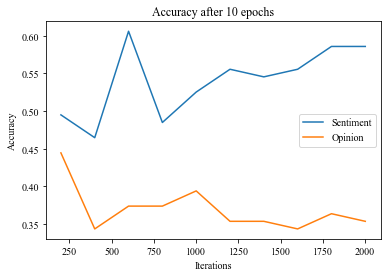

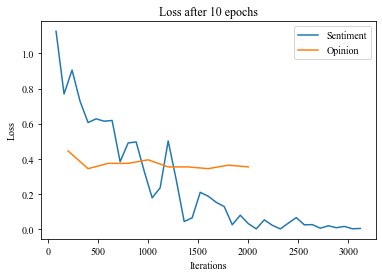

In [49]:
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'



sentiment_accuracy, iterations_accuracy_sent = read_values_csv("run-Sentiment_Bert_mit_spiegel_10E_sentiment_500_2e-5_batchsize2-tag-eval_accuracy.csv")
sentiment_loss, iterations_loss_sent = read_values_csv("run-runs_Mar09_22-01-14_jones-3-tag-train_loss_sentiment_800.csv")

opinion_accuracy, iterations_accuracy_op = read_values_csv("run-Sentiment_Bert_mit_spiegel_10E_opinion_500_2e-5_batchsize2-tag-eval_accuracy.csv")
opinion_loss, iterations_loss_op = read_values_csv("run-Sentiment_Bert_mit_spiegel_10E_opinion_500_2e-5_batchsize2-tag-eval_accuracy.csv")


fig1 = plt.figure()


iterations_accuracy_sent=np.array(iterations_accuracy_sent)*4
iterations_loss_sent=np.array(iterations_loss_sent)*4
iterations_accuracy_op=np.array(iterations_accuracy_op)*4
iterations_loss_op=np.array(iterations_loss_op)*4


plt.plot(iterations_accuracy_sent, sentiment_accuracy, label="Sentiment")
plt.plot(iterations_accuracy_op, opinion_accuracy, label="Opinion")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy after 10 epochs")
plt.legend()


plt.savefig('accuracy.png')

plt.show()  

fig2 = plt.figure()

plt.plot(iterations_loss_sent, sentiment_loss,  label="Sentiment")
plt.plot(iterations_loss_op, opinion_loss, label="Opinion")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss after 10 epochs")
plt.legend()



plt.savefig('loss.png')

plt.show()  



### Active Learning vs No Active Learning
This section shows the accuracies of a data set of size 1320 with and without active learning

11
11
ACCURACY [0.6318181872367858, 0.6325757503509521, 0.6280303001403809, 0.6431818246841431, 0.6409090995788574, 0.6272727251052856, 0.6409090876579284, 0.639393937587738, 0.6303030252456665, 0.6310606002807617, 0.6310606002807617]
ITER [132.0, 264.0, 396.0, 528.0, 660.0, 792.0, 924.0, 1056.0, 1188.0, 1320.0, 1320.0]
ITER [ 528. 1056. 1584. 2112. 2640. 3168. 3696. 4224. 4752. 5280. 5280.]


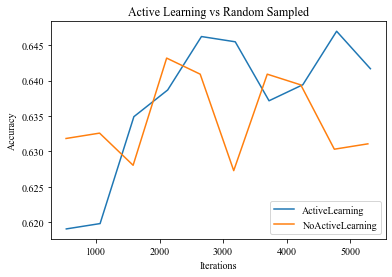

In [70]:
sentiment_accuracy, iterations_accuracy_sent = read_values_csv("MitAL1320Padding")
sentiment_accuracy_OAL, iterations_accuracy_sent_OAL = read_values_csv("1320padding_kein_al")
fig1 = plt.figure()

iterations_accuracy_sent=np.array(iterations_accuracy_sent)*4
iterations_accuracy_sent_OAL=np.array(iterations_accuracy_sent_OAL)*4


plt.plot(iterations_accuracy_sent, sentiment_accuracy, label="ActiveLearning")
plt.plot(iterations_accuracy_sent_OAL, sentiment_accuracy_OAL, label="NoActiveLearning")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Active Learning vs Random Sampled")
plt.legend()
plt.savefig('ALvsRS.png', transparent=False)

Text(0, 0.5, 'Accuracy')

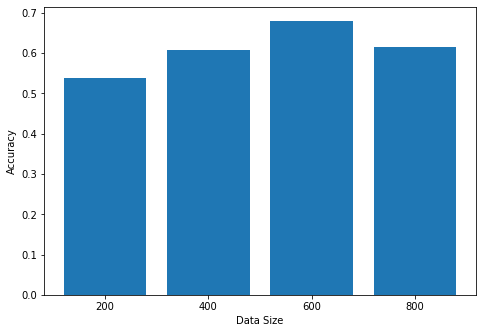

In [17]:
data_splits = ["200", "400", "600", "800"]

accuracies = [0.5384615384615384, 0.6075949367088608, 0.680672268907563, 0.6153846153846154]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_splits, accuracies)
ax.set_xlabel("Data Size")
ax.set_ylabel("Accuracy")


[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4), (0.35, 0.175, 0.4), (0.4, 0.2, 0.4)]


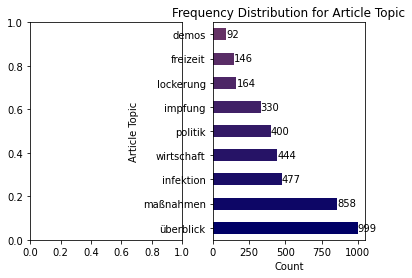

[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4), (0.35, 0.175, 0.4), (0.4, 0.2, 0.4)]


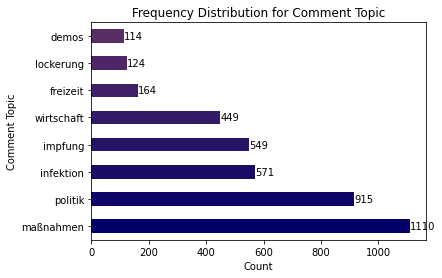

In [95]:
from turtle import color
from unicodedata import name
import matplotlib.pyplot as plt
import pandas as pd
topic_dataset = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check - Kopie.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment", "Method"], encoding="ISO8859-1")
my_colors = [(x/20, x/40, 0.4) for x in range(len(topic_dataset["Topic_article"].value_counts()))]
print(my_colors)
plt.subplots(1,2)
 
ax = topic_dataset["Topic_article"].value_counts().plot(kind="barh", color=my_colors)
plt.xlabel("Count")
plt.ylabel("Article Topic")

for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

plt.title("Frequency Distribution for Article Topic")
plt.show()

######
my_colors = [(x/20, x/40, 0.4) for x in range(len(topic_dataset["Topic_article"].value_counts()))]
print(my_colors)
ax = topic_dataset["topic_comment"].value_counts().plot(kind="barh", color=my_colors)
plt.xlabel("Count")
plt.ylabel("Comment Topic")

for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

plt.title("Frequency Distribution for Comment Topic")
plt.show()

[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4), (0.35, 0.175, 0.4)]
[999 858 477 444 400 330 310  92] xxxx
[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4)]


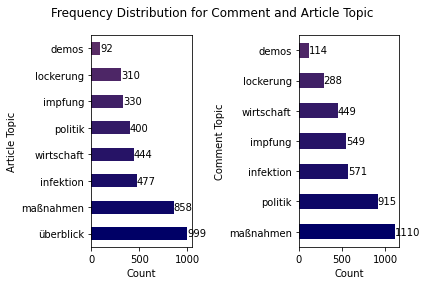

In [1]:
### Topic Graphs
from turtle import color
from unicodedata import name
import matplotlib.pyplot as plt
import pandas as pd
topic_dataset = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check - Kopie - Kopie.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment", "Method"], encoding="ISO8859-1")
my_colors = [(x/20, x/40, 0.4) for x in range(len(topic_dataset["Topic_article"].value_counts()))]
print(my_colors)
fig, axs = plt.subplots(1,2)

daten = topic_dataset["Topic_article"].value_counts()

topic_dataset["Topic_article"].value_counts().plot(ax=axs[0], kind="barh", color=my_colors)

plt.ylabel("Article Topic")
print(daten.values, "xxxx")



axs.flat[0].set(ylabel="Article Topic", xlabel = "Count")
axs.flat[1].set(ylabel="Comment Topic", xlabel = "Count")

my_colors = [(x/20, x/40, 0.4) for x in range(len(topic_dataset["topic_comment"].value_counts()))]
print(my_colors)
topic_dataset["topic_comment"].value_counts().plot(ax=axs[1], kind="barh", color=my_colors)

for plotnumber in range(2):
    for p in axs.flat[plotnumber].containers:
        axs.flat[plotnumber].bar_label(p, fmt="%.0f")

fig.suptitle("Frequency Distribution for Comment and Article Topic")

plt.tight_layout()
plt.show()

[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4), (0.35, 0.175, 0.4), (0.4, 0.2, 0.4), (0.45, 0.225, 0.4)]
[(0.0, 0.0, 0.4), (0.05, 0.025, 0.4), (0.1, 0.05, 0.4), (0.15, 0.075, 0.4), (0.2, 0.1, 0.4), (0.25, 0.125, 0.4), (0.3, 0.15, 0.4), (0.35, 0.175, 0.4), (0.4, 0.2, 0.4), (0.45, 0.225, 0.4)]


Text(0.5, 1.0, 'Top 10 User Frequency')

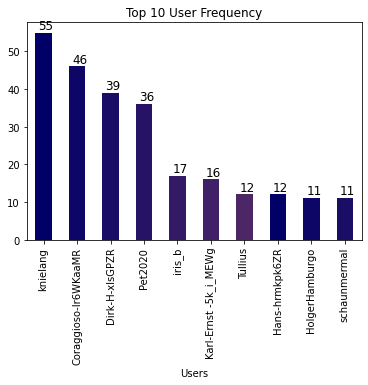

In [2]:
# Graph for User Frequency
from turtle import color
from unicodedata import name
import matplotlib.pyplot as plt
import pandas as pd
topic_dataset = pd.read_csv("annotated_data/annotated_data_with_users_and_al_cleaned2check - Kopie - Kopie.csv", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "comment", "Method"], encoding="ISO8859-1")
ax= topic_dataset["Username"].value_counts()[:10].plot(kind="bar", color=my_colors)

my_colors = [(x/20, x/40, 0.4 ) for x in range(len(ax.patches))]
print(my_colors)



print(my_colors)
for bar in ax.patches:
    ax.annotate(
        str(bar.get_height()), xy=(bar.get_x() + 0.1, bar.get_height() +1 ),
        fontsize = 12
    )
plt.xlabel("Users")
plt.title("Top 10 User Frequency")

### Extracting users with positive comments uttered
The goal now is to extract users who uttered a positive Sentiment for the majority of the comments annotated. Grouping the comments by Sentiment and by user, we can see that the user with the most reoccurences of positive Sentiment in the annotated comments has a total count of only 2 positive comments. This is the case for 8 users, but the total amount of comments annotated for the specific users differs from user to user. This is why the users with the highest proportion of positive Sentiment comments from their overall annotated comments have been chosen as positive users. For this case, two users with all annotated comments (two for each user) labled as positive and two users with 66% of all annotated comments (3 for each user) labled as positive have been identified as so-called positive users. With this approximation, the whole non-labled data set can be searched for 0-level comments from these specific users, automatically labeling them as positive comments. 

In [63]:
user_sentiment = topic_dataset[["Username", "Sentiment"]]
grouped = user_sentiment.groupby(["Sentiment", "Username"]).size()
user_positive = grouped["positive"].sort_values(ascending=False)[:10]
# grouped = user_sentiment.groupby("Username")
# grouped.count()
for user in user_positive.keys():
    print(user, "\t",user_positive[user], "\t", len(user_sentiment.loc[user_sentiment["Username"] == user]), user_positive[user]/len(user_sentiment.loc[user_sentiment["Username"] == user]))




the_hardest_part_is_over 	 2 	 3 0.6666666666666666
Dirk-H-xIsGPZR 	 2 	 39 0.05128205128205128
S.-y6s9a3wWR 	 2 	 6 0.3333333333333333
Stephan-wN4AzzeWR 	 2 	 5 0.4
DoktorM 	 2 	 2 1.0
Frietjoff 	 2 	 2 1.0
schaunmermal 	 2 	 11 0.18181818181818182
the_hardest_is_yet_to_come 	 2 	 3 0.6666666666666666
ray05 	 1 	 1 1.0
Rolf-mOxqBsEWg 	 1 	 2 0.5


We now identify all comments in the COVID related comments file where these Users appear and concatenate all of their comments together. For this approach of increasing sample size for the positive class, we take the first 100 comments from each user. This is output as a csv file.

In [78]:
alle_kommentare = pd.read_csv("shuffled_corona_relevante_kommentare.txt", names=["ID", "Date", "Time", "Comment Level", "Username", "Opinion", "Sentiment", "topic_comment", "Topic_article", "Comment"], 
                                    delimiter="\t", index_col=False)


alle_kommentare_positive_users = alle_kommentare.loc[(alle_kommentare["Username"].isin(["the_hardest_part_is_over", "the_hardest_is_yet_to_come", "DoktorM", "Frietjoff"])) & (alle_kommentare["Comment Level"] == 0)]
alle_kommentare_positive_users

,ID,Date,Time,Comment Level,Username,Opinion,Sentiment,topic_comment,Topic_article,Comment
108,ccbaffa1-eceb-41f5-9078-148ed74a7856,2021-06-13,19:01,0,the_hardest_part_is_over,"NTV meldet 1.142 neue Fälle, 43% weniger als ...",NaN,NaN,NaN,NaN
1186,c62d3cef-e54b-4612-9f18-56dd39785e3a,2021-03-13,00:44,0,Frietjoff,Statt in den Joe Biden versprochenen 100 Tagen...,NaN,NaN,NaN,NaN
1592,5c91f154-64cc-4ac7-9ab1-576bbfbdd409,2020-11-01,14:12,0,Frietjoff,Die Eltern sollen weiter arbeiten können. Nur...,NaN,NaN,NaN,NaN
2680,869e1f82-3a10-415c-a01a-4173d8435773,2020-06-01,10:30,0,Frietjoff,"Ich verstehe überhaupt nicht, wie man das jetz...",NaN,NaN,NaN,NaN
3827,3d627f77-84e2-4e94-bfd1-27e16f5fa78b,2021-07-13,15:30,0,Frietjoff,Nach dem vielen Hin und Her der letzten 15 Mon...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
402718,6324a215-2f5b-48ef-9c86-0e7137b7bed0,2021-05-10,08:35,0,the_hardest_part_is_over,Auf einer wunderbar sonnigen Bergwiese gibt es...,NaN,NaN,NaN,NaN
406763,8dfbb7a6-04f1-46ad-867c-73286076de2c,2021-04-30,10:11,0,DoktorM,Stiko erwartet Impfung von Kindern über zwölf ...,NaN,NaN,NaN,NaN
406802,f7e98a16-165b-4b90-b732-4231e9c58615,2021-04-24,11:56,0,DoktorM,Das was Frau Merkel sagt stimmt nicht. Bei den...,NaN,NaN,NaN,NaN
407562,48ecb6b2-d354-43d1-ac5a-5e07621f23bf,2021-04-29,18:00,0,the_hardest_is_yet_to_come,"Tag 4, Trendwende hält… n-tv meldet 13% wenige...",NaN,NaN,NaN,NaN


In [92]:
print(alle_kommentare_positive_users["Username"].value_counts())
frietjoff = alle_kommentare_positive_users.loc[alle_kommentare_positive_users["Username"] == "Frietjoff"]
the_hardest_is_yet_to_come =  alle_kommentare_positive_users.loc[alle_kommentare_positive_users["Username"] == "the_hardest_is_yet_to_come"]
DoktorM = alle_kommentare_positive_users.loc[alle_kommentare_positive_users["Username"] == "DoktorM"]
the_hardest_part_is_over = alle_kommentare_positive_users.loc[alle_kommentare_positive_users["Username"] == "the_hardest_part_is_over"]

concat_positive_users = pd.concat([frietjoff[:100], the_hardest_is_yet_to_come[:100], DoktorM[:100], the_hardest_part_is_over[:100]])
concat_positive_users.to_csv("annotated_data/data_augment_400_positive.csv", index = False)

Frietjoff                     343
the_hardest_is_yet_to_come    193
DoktorM                       167
the_hardest_part_is_over      130
Name: Username, dtype: int64
